In [71]:
import numpy as np
import random
from math import floor, ceil

from sklearn import preprocessing
import scipy.io as sio
from scipy.signal import resample
from scipy.interpolate import interp1d

%matplotlib inline
import matplotlib.pyplot as plt
import os
import math

In [3]:
def normalize(quant, minn, maxx):
    a = 0
    b = 1
    t = a + ( quant - minn) * ((b - a) / (maxx - minn))
    return t.astype(np.float32)

In [35]:
data = sio.loadmat('../../datasets/RawDataMats/LM10.mat')
print (data.keys())

voltage1 = normalize(data['vd'][:, 0], -300, 300)
voltage2 = normalize(data['vq'][: ,0], -300, 300)
speed = normalize(data['spd'][:, 0], -350, 350)
current1 = normalize(data['id'][:, 0], -30, 30)
current2 = normalize(data['iq'][:, 0], -30, 30)
torque = normalize(data['trq'][:, 0], -50, 50)
it = data['it'][:, 0]
vt = data['vt'][:, 0]

dict_keys(['__header__', '__version__', '__globals__', 'id', 'iq', 'it', 'spd', 'trq', 'vd', 'vq', 'vt'])


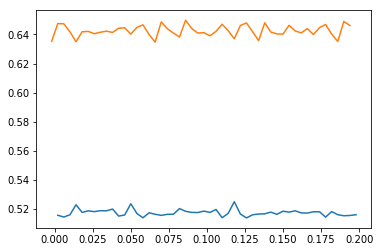

In [36]:
plt.plot(vt[:50], voltage1[:50])
plt.plot(it[:50], current1[:50])

In [60]:
f = interp1d(vt, voltage1)
nv1 = f(it[1:])

In [39]:
speed.shape, current1.shape

((10238,), (10242,))

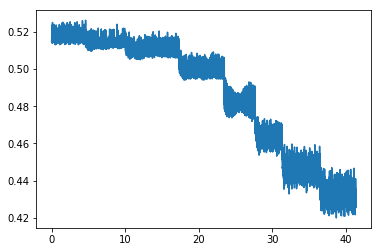

In [65]:
plt.plot(it[1:], nv1)

In [75]:
raws = os.listdir('../../datasets/RawDataMats/') 

In [76]:
vqs = []
vds = []
spds = []
iqs = []
ids = []
trqs = []
for raw in raws:
    data = sio.loadmat('../../datasets/RawDataMats/' + raw)
    vqs.append(data['vq'].min())
    vqs.append(data['vq'].max())
    vds.append(data['vd'].min())
    vds.append(data['vd'].max())
    iqs.append(data['iq'].min())
    iqs.append(data['iq'].max())
    ids.append(data['id'].min())
    ids.append(data['id'].max())
    trqs.append(data['trq'].min())
    trqs.append(data['trq'].max())
    spds.append(data['spd'].min())
    spds.append(data['spd'].max())
    

In [77]:
print (min(vqs),max(vqs))
print (min(vds),max(vds))
print (min(iqs),max(iqs))
print (min(ids),max(ids))
print (min(trqs) / 100 * 25,max(trqs) / 100 * 25)
print (min(spds) * 2 * math.pi,max(spds) * 2 * math.pi)

-445.7720947265625 459.1227722167969
-172.74371337890625 189.83258056640625
-23.712890625 24.44091796875
-7.93896484375 17.663330078125
-39.31884765625 39.404296875
-630.3222931221343 664.7409870503183


In [85]:
sims = os.listdir('../../datasets/SimSynthData/')

for sim in sims:
    v = sio.loadmat('../../datasets/SimSynthData/' + sim + '/Voltage.mat')['voltage']
    c = sio.loadmat('../../datasets/SimSynthData/' + sim + '/Current.mat')['current']
    s = sio.loadmat('../../datasets/SimSynthData/' + sim + '/Speed.mat')['speed']
    t = sio.loadmat('../../datasets/SimSynthData/' + sim + '/Torque.mat')['torque']
    time = sio.loadmat('../../datasets/SimSynthData/' + sim + '/Time.mat')['time']
    data = {'vd':v[:,0:1], 'vq':v[:,1:2], 'id':c[:,0:1], 'iq':c[:,1:2], 
            'spd':s[:,0:1], 'trq':t[:,0:1], 'it':time[:,0:1],'vt':time[:,0:1]}
    sio.savemat('../../datasets/data/' + sim, data)

In [81]:
v.shape

(71901, 2)